In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key,g_key
import scipy.stats as sts
from scipy.stats import linregress
import time

In [2]:
lat=np.random.uniform(-90.00,90.00,10000)

In [3]:
lon=np.random.uniform(-180,180.00,10000)

In [4]:
coordinates=list(zip(lat,lon))

In [5]:
cities=set()

In [6]:

for nos in coordinates:
    citi=citipy.nearest_city(nos[0],nos[1])
    city=citi.city_name
    cities.add(city)
    if len(cities)==600:
        break

In [7]:
len(cities)

600

In [8]:
cities=list(cities)

In [9]:
type(cities)

list

In [10]:
cities=pd.DataFrame({'Cities':cities})
cities.head()

,Cities
0,rancho palos verdes
1,sitka
2,port elizabeth
3,coihaique
4,dolores


In [11]:
cities['Latitude']=0
cities['Longitude']=0
cities['Cloudiness']=0
cities['Date']=""
cities['Humidity']=0
cities['Max_Temp']=0
cities['Wind Speed']=0

In [12]:
cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,rancho palos verdes,0,0,0,,0,0,0
1,sitka,0,0,0,,0,0,0
2,port elizabeth,0,0,0,,0,0,0
3,coihaique,0,0,0,,0,0,0
4,dolores,0,0,0,,0,0,0


In [13]:
# url='http://api.openweathermap.org/data/2.5/weather?'

In [14]:
# lat=response['coord']['lat']
# lon=response['coord']['lon']
# cloudiness=response['clouds']['all']
# date=response['dt']
# humidity=response['main']['humidity']
# max_temp=response['main']['temp_max']
# wind=response['wind']['speed']


In [15]:
counter=0
record=1
sets=1
print("="*30)
print("Begining Data Retrieval")
print("="*30)
print()

for index,row in cities.iterrows():
    print("Searching record {} of set {}  | {}".format(record,sets,row['Cities']))
    #print("Searching for {}".format(row['Cities']))
    url='http://api.openweathermap.org/data/2.5/weather?'
    q=row['Cities']
    params={'q':q, 'appid': weather_api_key,'units':'Imperial'}
    response=requests.get(url,params=params).json()
    try:
        cities.loc[index,'Latitude'] = response['coord']['lat']
        cities.loc[index,'Longitude'] = response['coord']['lon']
        cities.loc[index,'Cloudiness'] = response['clouds']['all']
        cities.loc[index,'Date'] = response['dt']
        cities.loc[index,'Humidity'] = response['main']['humidity']  
        cities.loc[index,'Max_Temp'] = response['main']['temp_max']
        cities.loc[index,'Wind Speed'] = response['wind']['speed']
    except KeyError:
        print("*"*30)
        print("Sorry couldn't find {}".format(row['Cities']))
        print("*"*30)
        
            
    record+=1
    if record ==51:
        print("-"*75)
        print("Counter has reached 50, program will pause for 1 second before resuming")
        print("-"*75)
        record=1
        sets+=1 
        time.sleep(1)

print()
print("="*30)
print("Data Retrieval Complete")
print("="*30)

Begining Data Retrieval

Searching record 1 of set 1  | rancho palos verdes
Searching record 2 of set 1  | sitka
Searching record 3 of set 1  | port elizabeth
Searching record 4 of set 1  | coihaique
Searching record 5 of set 1  | dolores
Searching record 6 of set 1  | qitaihe
Searching record 7 of set 1  | kamenka
Searching record 8 of set 1  | nome
Searching record 9 of set 1  | carnarvon
Searching record 10 of set 1  | moengo
Searching record 11 of set 1  | arraial do cabo
Searching record 12 of set 1  | faanui
Searching record 13 of set 1  | sumbawa
******************************
Sorry couldn't find sumbawa
******************************
Searching record 14 of set 1  | promyshlennyy
Searching record 15 of set 1  | yar-sale
Searching record 16 of set 1  | ahipara
Searching record 17 of set 1  | guangyuan
Searching record 18 of set 1  | batticaloa
Searching record 19 of set 1  | marystown
Searching record 20 of set 1  | saint albans
Searching record 21 of set 1  | praia da vitoria
Se

Searching record 15 of set 4  | newberry
Searching record 16 of set 4  | teresopolis
Searching record 17 of set 4  | karla
Searching record 18 of set 4  | hobart
Searching record 19 of set 4  | morvi
Searching record 20 of set 4  | taoudenni
Searching record 21 of set 4  | faya
Searching record 22 of set 4  | meulaboh
Searching record 23 of set 4  | avera
Searching record 24 of set 4  | vila franca do campo
Searching record 25 of set 4  | goderich
Searching record 26 of set 4  | lethem
Searching record 27 of set 4  | hofn
Searching record 28 of set 4  | bambous virieux
Searching record 29 of set 4  | kribi
Searching record 30 of set 4  | erandio
Searching record 31 of set 4  | stornoway
Searching record 32 of set 4  | pevek
Searching record 33 of set 4  | qaqortoq
Searching record 34 of set 4  | porto torres
Searching record 35 of set 4  | yellowknife
Searching record 36 of set 4  | lyubar
Searching record 37 of set 4  | port alfred
Searching record 38 of set 4  | dzerzhinsk
Searching 

Searching record 11 of set 7  | poretskoye
Searching record 12 of set 7  | vaitupu
******************************
Sorry couldn't find vaitupu
******************************
Searching record 13 of set 7  | chuy
Searching record 14 of set 7  | broken hill
Searching record 15 of set 7  | hambantota
Searching record 16 of set 7  | saskylakh
Searching record 17 of set 7  | campo verde
Searching record 18 of set 7  | atuona
Searching record 19 of set 7  | phek
Searching record 20 of set 7  | bredasdorp
Searching record 21 of set 7  | airai
Searching record 22 of set 7  | kodiak
Searching record 23 of set 7  | ruatoria
******************************
Sorry couldn't find ruatoria
******************************
Searching record 24 of set 7  | pochutla
Searching record 25 of set 7  | tukrah
Searching record 26 of set 7  | shimoda
Searching record 27 of set 7  | ancud
Searching record 28 of set 7  | severo-kurilsk
Searching record 29 of set 7  | chokurdakh
Searching record 30 of set 7  | redlands


Searching record 16 of set 10  | samalaeulu
******************************
Sorry couldn't find samalaeulu
******************************
Searching record 17 of set 10  | zhanatas
******************************
Sorry couldn't find zhanatas
******************************
Searching record 18 of set 10  | heihe
Searching record 19 of set 10  | lorengau
Searching record 20 of set 10  | mabaruma
Searching record 21 of set 10  | oropesa
Searching record 22 of set 10  | harpanahalli
Searching record 23 of set 10  | prince rupert
Searching record 24 of set 10  | te anau
Searching record 25 of set 10  | kruisfontein
Searching record 26 of set 10  | hay river
Searching record 27 of set 10  | matata
Searching record 28 of set 10  | humboldt
Searching record 29 of set 10  | mount gambier
Searching record 30 of set 10  | kahone
Searching record 31 of set 10  | patrocinio
Searching record 32 of set 10  | havelock
Searching record 33 of set 10  | houma
Searching record 34 of set 10  | aktash
Searching

In [16]:
cities.shape

(600, 8)

In [71]:
df_cities=(cities[cities['Latitude']!=0])

In [72]:
df_cities.head()

,Cities,Latitude,Longitude,Cloudiness,Date,Humidity,Max_Temp,Wind Speed
0,rancho palos verdes,33.74,-118.39,40,1600018654,77,72.00,7.83
1,sitka,57.05,-135.33,1,1600018660,71,51.80,4.05
2,port elizabeth,-33.92,25.57,20,1600018661,72,59.00,17.22
3,coihaique,-45.58,-72.07,40,1600018661,72,50.00,6.93
4,dolores,-36.31,-57.68,51,1600018661,51,66.42,9.86


In [73]:
df_cities.shape

(552, 8)

In [74]:
#Creating Variables for Scatter Plots
lat=df_cities['Latitude']
humidity=df_cities['Humidity']
cloudiness=df_cities['Cloudiness']
wind_speed=df_cities['Wind Speed']
temp=df_cities['Max_Temp']

### LATITUDE VS TEMPERATURE

(-0.3188640978685947, 1.6427133493239305e-14)

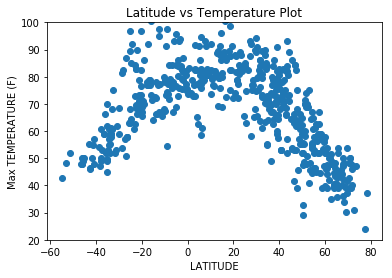

In [133]:
plt.scatter(lat,temp)
plt.ylabel('Max TEMPERATURE (F)')
plt.xlabel('LATITUDE')
plt.ylim(20,100)
plt.title('Latitude vs Temperature Plot')
corr=sts.pearsonr(temp,lat);
corr

### We can see that temperature rises as we move towards the equator and goes down as we move away

### LATITUDE VS HUMIDITY

(0.17191489937137616, 4.90314488102486e-05)

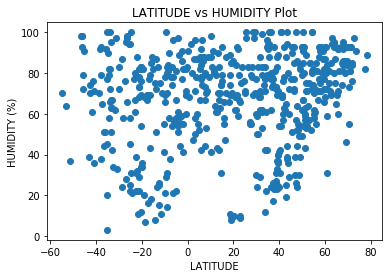

In [134]:
plt.scatter(lat,humidity)
plt.ylabel('HUMIDITY (%)')
plt.xlabel('LATITUDE')
plt.title('LATITUDE vs HUMIDITY Plot')
corr=sts.pearsonr(humidity,lat);
corr

### Since p-value <<< , results are statistically significant, therfore it is difficult to determine relationship between latitude and humidity

### LATITUDE VS CLOUDINESS

(0.19651036044812617, 3.288657894502744e-06)

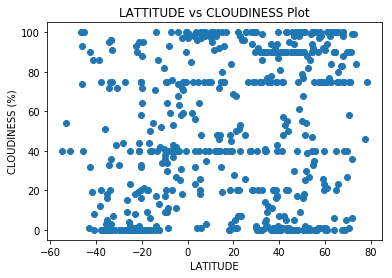

In [80]:
plt.scatter(lat,cloudiness)
plt.ylabel('CLOUDINESS (%)')
plt.xlabel('LATITUDE')
plt.title('LATTITUDE vs CLOUDINESS Plot')
corr=sts.pearsonr(cloudiness,lat);
corr

### Cloudiness is evenly spread and symmetrical in patterns in the northen and southern hemisphere

### LATITUDE VS WIND SPEED

(-0.10887177194735152, 0.01047560022620967)

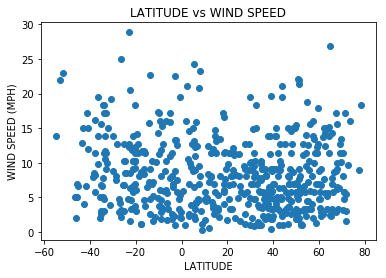

In [81]:
plt.scatter(lat,wind_speed)
plt.xlabel('LATITUDE')
plt.ylabel('WIND SPEED (MPH)')
plt.title('LATITUDE vs WIND SPEED')
corr=sts.pearsonr(wind_speed,lat);
corr

###  Above code is analyzing wind speed across the northen and southern hemisphere

In [82]:
#Separating NORTHEN AND SOUTHERN HEMISPHERES
df_south=df_cities[df_cities['Latitude'] < 0]
df_north=df_cities[df_cities['Latitude'] >= 0]

In [83]:
#Generating variables for latitdues
lat_s=df_south['Latitude']
lat_n=df_north['Latitude']

In [85]:
#Generating variables for required entities for regression
temp_n=df_north['Max_Temp']
temp_s=df_south['Max_Temp']
hum_n=df_north['Humidity']
hum_s=df_south['Humidity']
cloud_n=df_north['Cloudiness']
cloud_s=df_south['Cloudiness']
wind_n=df_north['Wind Speed']
wind_s=df_south['Wind Speed']

### Regression Analysis

### Latitude (N) vs Max Temp

In [102]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),temp_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.66x + 93.16'

Text(0, 0.5, 'Max Temp (F)')

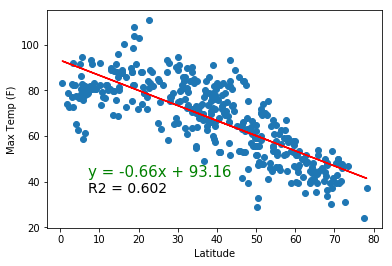

In [103]:
plt.scatter(lat_n,temp_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(7,42),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(7,35),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Temperature drops as we move away from the equator

### Latitude (S) vs Max Temp

In [136]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),temp_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.79x + 87.97'

In [137]:
rvalue

0.703693072991822

Text(0, 0.5, 'Max Temp (F)')

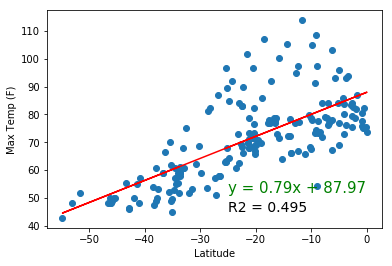

In [138]:
plt.scatter(lat_s,temp_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-25,52),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-25,45),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Temperature rises as we move towards the equator

### Latitude (N) vs Humidity

In [141]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),hum_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.15x + 64.24'

Text(0, 0.5, 'Humidity')

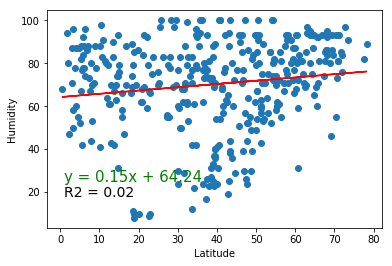

In [142]:
plt.scatter(lat_n,hum_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(1,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(1,18),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Humidity very slightly rises or remains constant as we move away from the equator based on line equation

### Latitude (S) vs Humidity

In [110]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),hum_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.15x + 59.5'

Text(0, 0.5, 'Humidity')

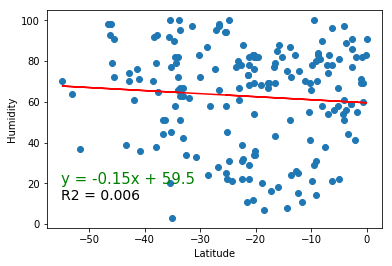

In [114]:
plt.scatter(lat_s,hum_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-55,20),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-55,12),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Humidty reduces based on line equaiton as we move towards equator

### Latitude(N) vs Cloudiness

In [115]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),cloud_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.0x + 55.25'

Text(0, 0.5, 'Cloudiness')

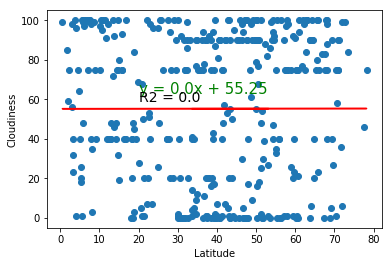

In [120]:
plt.scatter(lat_n,cloud_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(20,63),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(20,59),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Cloudiness more or less remains constant, latitude has very little affect on it in the northen hemisphere

### Latitude (S) vs Cloudiness

In [121]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),cloud_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.34x + 45.55'

Text(0, 0.5, 'Cloudiness')

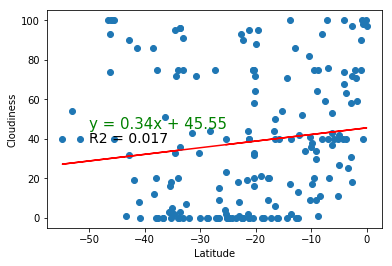

In [124]:
plt.scatter(lat_s,cloud_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,45),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,38),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Cloudiness tends to rise as we move towrards equator from the Southern Hemisphere

### Latitude (N) vs Wind Speed

In [125]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),wind_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.01x + 7.53'

Text(0, 0.5, 'Wind Speed mph')

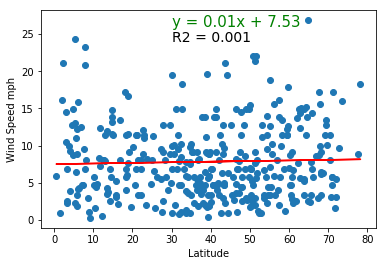

In [128]:
plt.scatter(lat_n,wind_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(30,26),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(30,24),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### As per the line eq- latitude hardly contributes to the wind speed in the northen hemisphere

### Latitude (S) vs Wind Speed

In [129]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),wind_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.07x + 7.74'

Text(0, 0.5, 'Wind Speed mph')

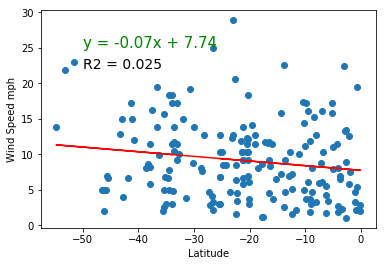

In [132]:
plt.scatter(lat_s,wind_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,22),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### Wind speed is greater away from the equator in the southern hemisphere